<a href="https://colab.research.google.com/github/GinuraAdikari/InsightHive/blob/Customer_Segmentation/Improve_Accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

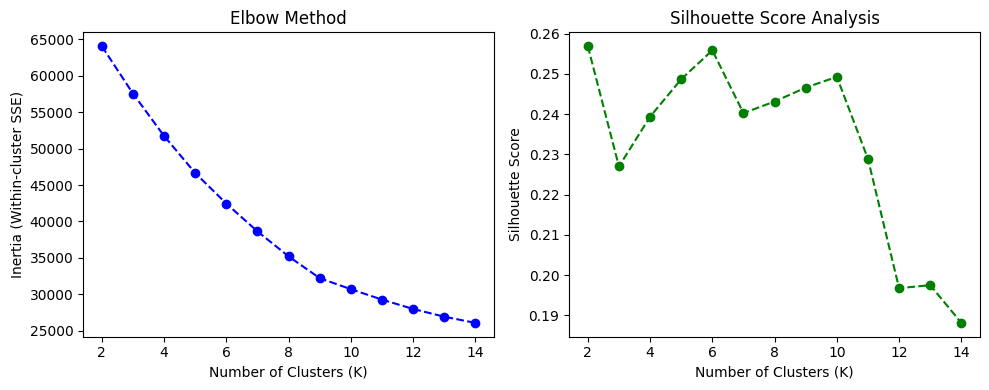


Optimal K: 6


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import cdist
from sklearn.impute import SimpleImputer

# Load Data
file_path = "PCA_Data.csv"
df = pd.read_csv(file_path)

# Handle Missing Values
imputer = SimpleImputer(strategy='mean')  # Replace NaN with column mean
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

#01. Find the Best K
inertia = []
silhouette_scores = []
davies_bouldin_scores = []
K_range = range(2, 15)  # Testing K from 2 to 15

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=20, max_iter=500, random_state=42)
    labels = kmeans.fit_predict(df_scaled)

    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, labels))
    davies_bouldin_scores.append(davies_bouldin_score(df_scaled, labels))

# Plot Elbow Method
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster SSE)')
plt.title('Elbow Method')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='g')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')

plt.tight_layout()
plt.show()

# Best K based on Silhouette Score
optimal_k = 6
print(f"\nOptimal K: {optimal_k}")




In [ ]:
#02. Train K-Means with Optimized Hyperparameters

# max_iter: Default is 300 but increasing it helps convergence.
# n_init: Number of times the algorithm runs with different centroid seeds. Default is 10

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=30, max_iter=600, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Compute Cluster Centroids
centroids = kmeans.cluster_centers_  # Normalized space
centroids_original = scaler.inverse_transform(centroids)  # Convert back to original scale

print("\nCluster Centroids (Original Scale):\n", centroids_original)


# 03. Evaluate Model Performance
silhouette_avg = silhouette_score(df_scaled, df['Cluster'])
davies_bouldin = davies_bouldin_score(df_scaled, df['Cluster'])

print(f"\nFinal Silhouette Score: {silhouette_avg:.4f} (Higher is better)")
print(f"Final Davies-Bouldin Index: {davies_bouldin:.4f} (Lower is better)")

# 04. Compute Distance to Cluster Centroids
distances = np.min(cdist(df_scaled, centroids, 'euclidean'), axis=1)
df['Distance_to_Centroid'] = distances


Cluster Centroids (Original Scale):
 [[-0.04769387 -2.07794768 -0.36987271 -0.05698995  0.77036038  1.17829504
   0.23084056  0.273404  ]
 [ 1.11356884  1.7441927  -0.11189626 -0.58129406  0.05655948  0.22419322
   0.48924472  0.27084978]
 [-0.30115341 -0.01568421  0.54056413 -0.08528879 -0.05977232 -0.23417726
  -0.33347653 -0.12256147]
 [ 7.67231952 -1.28173131 -2.21673093  0.37232373 -1.66494169 -0.03867382
  -1.45234685 -0.07486373]
 [ 2.08189889  2.86758219  3.44437927  7.34515795 -0.95402675  3.49065412
   0.84470394 -1.33845622]
 [-1.51140967 -0.25090246 -1.46310999  0.86423231 -0.37307953 -0.76597893
   0.54769287 -0.1169789 ]]

Final Silhouette Score: 0.2559 (Higher is better)
Final Davies-Bouldin Index: 1.4525 (Lower is better)
